In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder , LabelEncoder,StandardScaler
import seaborn as sb
from  sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
import numpy as np

In [44]:
df  = pd.read_csv('heart.csv')

In [45]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


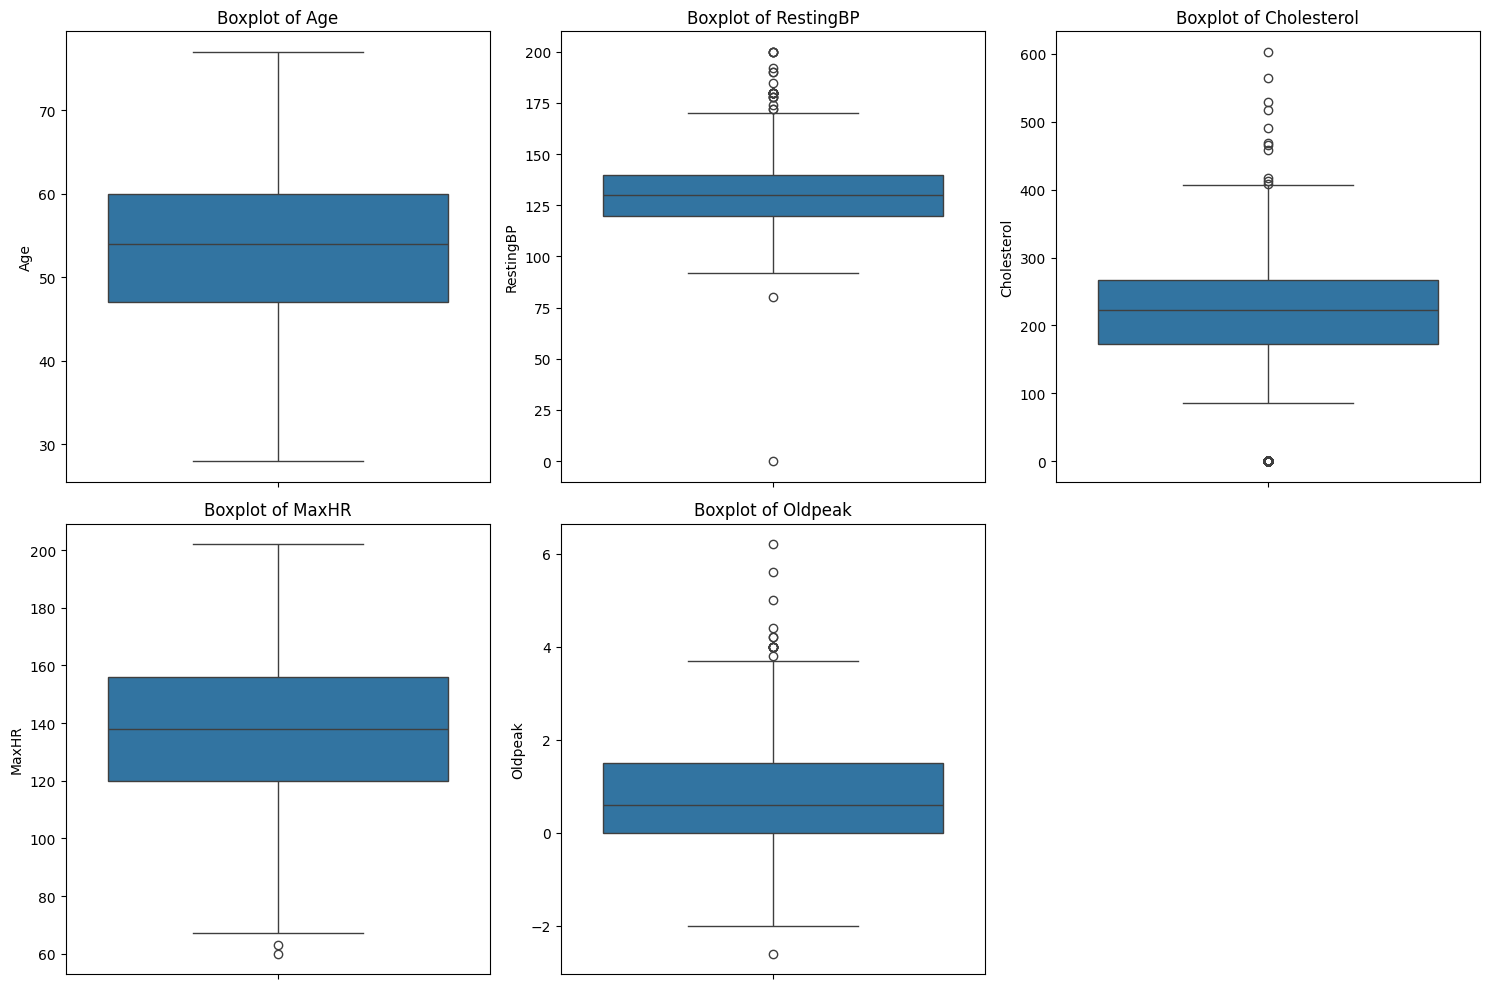

In [46]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_col):
    plt.subplot(2, 3,i+1)
    sb.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [47]:
def trim_outliers(df,col):
    q1 = df[col].quantile(0.25)
    q2 = df[col].quantile(0.75)
    IQR = q2-q1
    lower = q1 - 1.5* IQR
    upper = q2 + 1.5* IQR

    return df[(df[col]>=lower) & (df[col] <=upper)]


In [48]:
def cap_outliers(df,col):
    q1 = df[col].quantile(0.75)
    q2 = df[col].quantile(0.25)
    IQR = q2 - q1
    lower = q1 - 1.5 * IQR
    upper = q2 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper, 
                       np.where(df[col] < lower, lower, df[col]))
    return df

In [49]:
num_col = df[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']]

In [50]:
for col in num_col:
    df = cap_outliers(df,col)

In [51]:
cat_col = df[['Sex','ExerciseAngina']]

In [52]:
le = LabelEncoder()

In [53]:
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [56]:
df_encoded = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'])

In [ ]:
scaler = StandardScaler()
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print(f"Features reduced from {X.shape[1]} to {pca.n_components_} components")

Features reduced from 18 to 13 components


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=9)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8804347826086957
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        77
           1       0.93      0.86      0.89       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.88      0.88       184



In [ ]:
import pickle

with open()